Importing Libraries

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

Imort data

In [123]:
df = pd.read_csv("college_student_placement_dataset.csv")
df.head(4)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No


data laoded successful

### Data anlysis

In [124]:
df.size

100000

In [125]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

there are not any null vlaues so, no need to clean null values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [127]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


Now its time to data preparation

In [128]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


there is no need of College_ID so remove it

In [129]:
df = df.drop("College_ID", axis = 1)
df.head(3)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No


### Data Analysis

How many people got placed

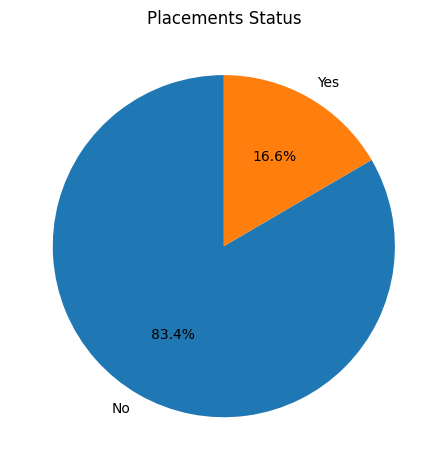

In [130]:
df["Placement"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90)
plt.title("Placements Status")
plt.ylabel("")
plt.tight_layout()
plt.show()

How many people have intership experience

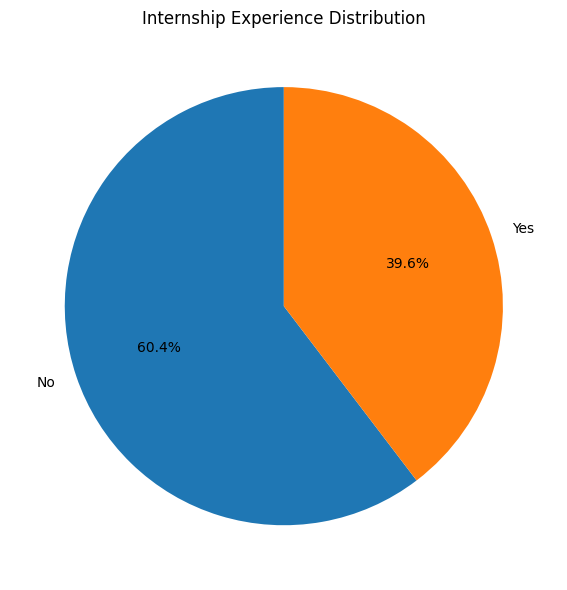

In [131]:
plt.figure(figsize=(6, 6))
df["Internship_Experience"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90)
plt.title("Internship Experience Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


Placements and internship status together

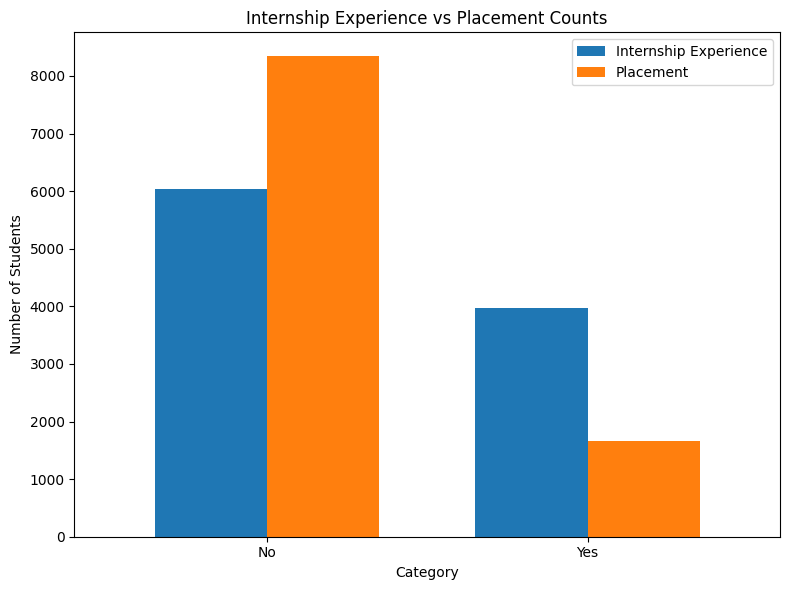

In [132]:
intern_counts = df["Internship_Experience"].value_counts()
placement_counts = df["Placement"].value_counts()

combined_df = pd.DataFrame({
    'Internship Experience': intern_counts,
    'Placement': placement_counts
}).fillna(0)
# Plot grouped bar chart
combined_df.plot(kind='bar', figsize=(8, 6), width=0.7)
plt.title("Internship Experience vs Placement Counts")
plt.ylabel("Number of Students")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


Academic Performance of Students

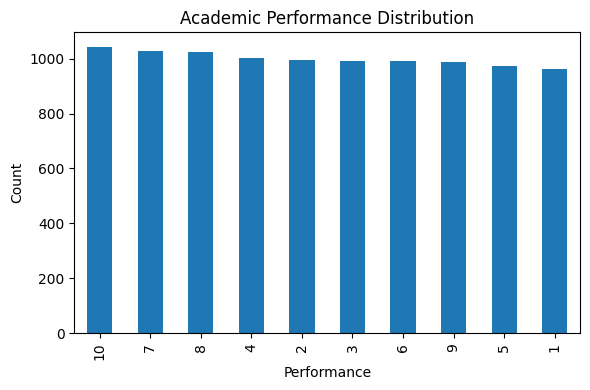

In [133]:
plt.figure(figsize=(6, 4))
df["Academic_Performance"].value_counts().plot(kind="bar")
plt.title("Academic Performance Distribution")
plt.xlabel("Performance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

No. of projects people have made

Projects_Completed
5    1702
4    1693
0    1688
2    1681
3    1627
1    1609
Name: count, dtype: int64


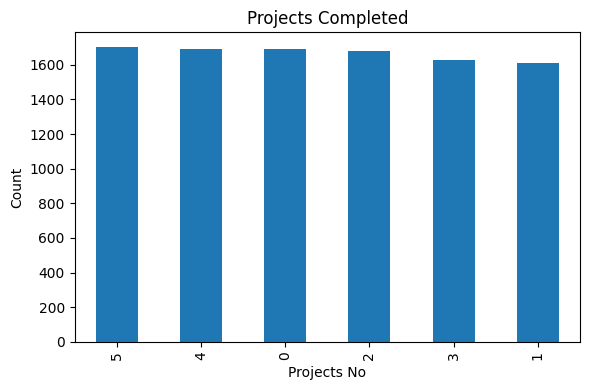

In [134]:
print(df["Projects_Completed"].value_counts())
plt.figure(figsize=(6, 4))
df["Projects_Completed"].value_counts().plot(kind="bar")
plt.title("Projects Completed")
plt.xlabel("Projects No")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

prepareing data for training


There are two column are in object value so we need to replace with int value

In [135]:
df['Internship_Experience'] = df['Internship_Experience'].replace({"Yes":1, "No":0})
df['Placement']= df['Placement'].replace({"Yes":1, "No":0})

check data

In [136]:
df.dtypes

IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience       int64
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                   int64
dtype: object

count the placed student and not placed students

In [137]:
df['Placement'].value_counts()

Placement
0    8341
1    1659
Name: count, dtype: int64

count the value of internship exprienced student

In [138]:
df['Internship_Experience'].value_counts()

Internship_Experience
0    6036
1    3964
Name: count, dtype: int64

In [139]:
X = df.drop("Placement", axis=1)
y = df['Placement']
X.head(3)
# y.head(3)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1


In [140]:
y.head(3)

0    0
1    0
2    0
Name: Placement, dtype: int64

importing modules for machine learing

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
)

spliting the values to train

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [143]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 8)
(6000,)
(4000, 8)
(4000,)


Feature Scaling


In [144]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

print("X_train_Scaled: ",X_test_scaled)
print("X_test_Scaled: ",X_test_scaled)

X_train_Scaled:  [[ 2.63763443 -0.15275614 -0.18180678 ...  0.96667748 -0.53964828
   0.86862113]
 [-1.01882162  0.53616525  0.67701198 ... -0.62090255 -0.88657743
   1.45119734]
 [-0.35401143 -1.56539292 -1.26735369 ...  0.64916147  1.54192658
   0.86862113]
 ...
 [ 1.50745711 -1.05044158 -0.86199124 ... -1.57345057  0.15421
  -0.29653129]
 [ 1.04208997 -0.89038914 -1.15742489 ...  0.01412946  0.84806829
  -0.29653129]
 [-0.02160633  1.46168589  1.26787929 ... -0.62090255 -1.23350657
  -0.29653129]]
X_test_Scaled:  [[ 2.63763443 -0.15275614 -0.18180678 ...  0.96667748 -0.53964828
   0.86862113]
 [-1.01882162  0.53616525  0.67701198 ... -0.62090255 -0.88657743
   1.45119734]
 [-0.35401143 -1.56539292 -1.26735369 ...  0.64916147  1.54192658
   0.86862113]
 ...
 [ 1.50745711 -1.05044158 -0.86199124 ... -1.57345057  0.15421
  -0.29653129]
 [ 1.04208997 -0.89038914 -1.15742489 ...  0.01412946  0.84806829
  -0.29653129]
 [-0.02160633  1.46168589  1.26787929 ... -0.62090255 -1.23350657
  -0.

Model Implementation

In [145]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:,1]

evaluation

In [146]:
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3368
           1       1.00      0.99      1.00       632

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [147]:

print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))

 Accuracy: 0.999
 Precision: 1.0


confusion matrix

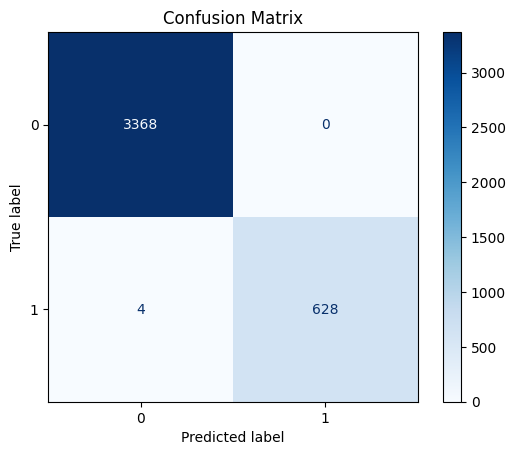

In [148]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

feature importance


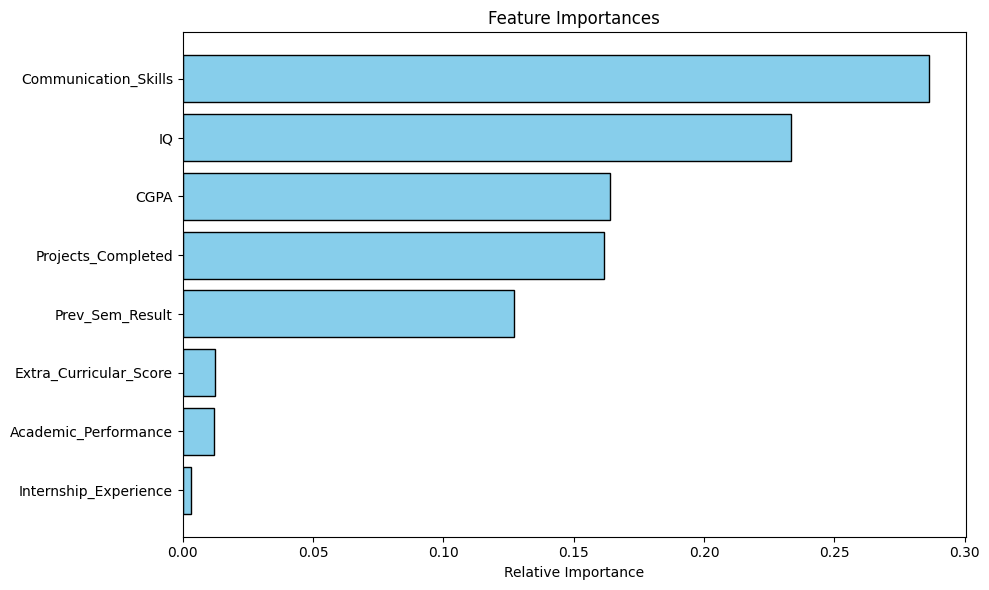

In [149]:
importances = model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="skyblue", edgecolor="black")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()